<a id='contenidos'></a>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Descripción-del-proyecto" data-toc-modified-id="Descripción-del-proyecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Descripción del proyecto</a></span></li><li><span><a href="#Inicialización" data-toc-modified-id="Inicialización-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inicialización</a></span></li><li><span><a href="#Cargar-los-datos" data-toc-modified-id="Cargar-los-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Cargar los datos</a></span></li><li><span><a href="#Preprocesamiento-de-los-datos" data-toc-modified-id="Preprocesamiento-de-los-datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocesamiento de los datos</a></span><ul class="toc-item"><li><span><a href="#Valores-nulos" data-toc-modified-id="Valores-nulos-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Valores nulos</a></span></li><li><span><a href="#Valores-duplicados" data-toc-modified-id="Valores-duplicados-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Valores duplicados</a></span></li></ul></li><li><span><a href="#Análisis-exploratorio-de-los-datos" data-toc-modified-id="Análisis-exploratorio-de-los-datos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Análisis exploratorio de los datos</a></span></li><li><span><a href="#Comparación-entre-el-grupo-de-control-y-el-grupo-de-prueba" data-toc-modified-id="Comparación-entre-el-grupo-de-control-y-el-grupo-de-prueba-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparación entre el grupo de control y el grupo de prueba</a></span><ul class="toc-item"><li><span><a href="#Prueba-t-student" data-toc-modified-id="Prueba-t-student-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Prueba t-student</a></span></li><li><span><a href="#Prueba-Z-para-dos-proporciones" data-toc-modified-id="Prueba-Z-para-dos-proporciones-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Prueba Z para dos proporciones</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

## Descripción del proyecto  
Hemos recibido una tarea analítica de una tienda en línea internacional. Nuestros predecesores no consiguieron completarla: lanzaron una prueba A/B y luego abandonaron. Solo dejaron las especificaciones técnicas y los resultados de las pruebas.

**Descripción técnica**  
- Nombre de la prueba: recommender_system_test
- Grupos: А (control), B (nuevo embudo de pago)
- Launch date: 2020-12-07
- Fecha en la que dejaron de aceptar nuevos usuarios: 2020-12-21
- Fecha de finalización: 2021-01-01
- Audiencia: 15% de los nuevos usuarios de la región de la UE
- Propósito de la prueba: probar cambios relacionados con la introducción de un sistema de recomendaciones mejorado
- Resultado esperado: dentro de los 14 días posteriores a la inscripción, los usuarios mostrarán una mejor conversión en vistas de la página del producto (el evento product_page), instancias de agregar artículos al carrito de compras (product_card) y compras (purchase). En cada etapa del embudo product_page → product_card → purchase, habrá al menos un 10% de aumento.
- Número previsto de participantes de la prueba: 6 000

[Volver a contenidos](#contenidos)
## Inicialización 
En esta sección vamos a cargar las librerías para el estudio

In [1]:
import pandas as pd
import statsmodels.api as sm
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

sns.set_palette(palette='tab10')

[Volver a contenidos](#contenidos)
## Cargar los datos  
En esta sección vamos a cargar el set de datos y revisar que las variables tengan el tipo de datos adecuado.

In [2]:
# creamos el dataframe que contiene el calendario de eventos de marketing para 2020
ab_project_marketing_event_us=pd.read_csv('ab_project_marketing_event_us.csv',sep=',',parse_dates=['start_dt','finish_dt'])

In [3]:
# mostramos información general del calendario de eventos
ab_project_marketing_event_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


In [4]:
# mostramos parte del calendario de eventos
ab_project_marketing_event_us.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


---
Estructura ab_project_marketing_events_us.csv:
- name: el nombre del evento de marketing
- regions: regiones donde se llevará a cabo la campaña publicitaria
- start_dt: fecha de inicio de la campaña
- finish_dt: fecha de finalización de la campaña

In [5]:
"""creamos el dataframe que contiene los datos de los usuarios que se registraron en la tienda
en línea desde el 7 hasta el 21 de diciembre de 2020"""
final_ab_new_users_upd_us=pd.read_csv('final_ab_new_users_upd_us.csv',sep=',',parse_dates=['first_date'])

In [6]:
# mostramos información general de los usuarios registrados
final_ab_new_users_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [7]:
# mostramos parte de los usuarios registrados
final_ab_new_users_upd_us.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


---
Estructura final_ab_new_users_upd_us.csv:
- user_id
- first_date: fecha de inscripción
- region
- device: dispositivo utilizado para la inscripción

In [8]:
"""creamos el dataframe que contiene los eventos de los nuevos usuarios en el período comprendido entre el 7 de
diciembre de 2020 y el 1 de enero de 2021"""
final_ab_events_upd_us=pd.read_csv('final_ab_events_upd_us.csv',sep=',',parse_dates=['event_dt'])

In [9]:
# mostramos información general de los eventos de los usuarios
final_ab_events_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [10]:
# mostramos parte de los eventos de los usuarios
final_ab_events_upd_us.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


---
Estructura final_ab_events_upd_us.csv:
- user_id
- event_dt: fecha y hora del evento
- event_name: nombre del tipo de evento
- details: datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos purchase)

In [11]:
"""creamos el dataframe que contiene los datos de los participantes de la prueba"""
final_ab_participants_upd_us=pd.read_csv('final_ab_participants_upd_us.csv',sep=',')

In [12]:
# mostramos información general de los participantes de la prueba
final_ab_participants_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [14]:
# TODO: Faltaba esta sección por completitud

# mostramos parte de los participantes de la prueba
final_ab_participants_upd_us.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


---
Estructura final_ab_participants_upd_us.csv:
- user_id
- ab_test: nombre de la prueba
- group: el grupo de prueba al que pertenecía el usuario

[Volver a contenidos](#contenidos)
## Preprocesamiento de los datos

Observamos que los nombres de las columnas están escritas correctamente empleando **snake_case** y que el tipo de datos es correcto.

### Valores nulos

Para el caso de valores nulos, notamos que solo el dataframe `'final_ab_events_upd_us'` que contiene los datos de los eventos de los usuarios tiene valores nulos.

In [15]:
# buscamos los valores nulos en el dataframe de los eventos de los usuarios
final_ab_events_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [16]:
# buscamos los eventos en los cuales hay valores nulos
final_ab_events_upd_us.groupby('event_name')['details'].count()

event_name
login               0
product_cart        0
product_page        0
purchase        60314
Name: details, dtype: int64

Notamos que los valores no nulos en `'details'` pertenecen al evento `'purchase'`, es decir; no tenemos valores nulos para las compras hechas. Por lo que al parecer no tenemos problemas en los datos.

### Valores duplicados  
Revisamos si tenemos registros duplicados en cada uno de los dataframes.

In [17]:
# revisamos valores duplicados en el calendario de eventos
ab_project_marketing_event_us.duplicated().sum()

0

In [18]:
# revisamos valores duplicados en el dataframe de usuarios registrados
final_ab_new_users_upd_us.duplicated().sum()

0

In [19]:
# revisamos valores duplicados en el dataframe de los eventos de los usuarios
final_ab_events_upd_us.duplicated().sum()

0

In [20]:
# revisamos valores duplicados en el dataframe de los participantes en la prueba
final_ab_participants_upd_us.duplicated().sum()

0

**No tenemos valores faltantes ni duplicados en los set de datos.** Antes de proceder al análisis exploratorio de los datos vamos a unir los dataframes para poder realizar los análisis posteriores.

In [21]:
final_ab_events_upd_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     60314 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


In [22]:
# para unir el dataframe de eventos del usuario con el calendario de eventos necesitamos crear una columna con la fecha de 'event_dt'
final_ab_events_upd_us['event_date']=final_ab_events_upd_us['event_dt'].values.astype('datetime64[D]')
final_ab_events_upd_us.shape

(423761, 5)

In [23]:
# unimos los eventos de los usuarios con su fecha correspondiente en el calendario de eventos 
ab_users_events=final_ab_events_upd_us.merge(ab_project_marketing_event_us,left_on='event_date',right_on='start_dt',how='left')
ab_users_events.shape

(423761, 9)

Tenemos ahora asociado para cada evento el nombre del evento en el calendario. Unamos ahora el registro de usuarios con los datos de los participantes en la prueba.

In [24]:
# creamos un dataframe que contenga los usuarios que se registraron y participaron en la prueba
# unimos para cada registro de usuario su participacion en la prueba, unimos usando el 'user_id'
ab_users_groups=final_ab_new_users_upd_us.merge(final_ab_participants_upd_us,on='user_id',how='inner')
ab_users_groups.shape

(14525, 6)

In [25]:
# agrupamos por la columna 'ab_test'
ab_users_groups.groupby('ab_test')['group'].value_counts()

ab_test                  group
interface_eu_test        A        5467
                         B        5383
recommender_system_test  A        2747
                         B         928
Name: count, dtype: int64

Notamos que tenemos dos tipos de pruebas registradas, estamos interesados solo en la prueba `'recommender_system_test'`. En esta prueba tenemos dos grupos, el grupo A con 2,747 participantes y el grupo B con 928.

In [26]:
# creamos un dataframe para los usuarios que participaron unicamente en la prueba 'recommender_system_test'
ab_users_groups_system=ab_users_groups.query('ab_test=="recommender_system_test"')
ab_users_groups_system.shape

(3675, 6)

**Tenemos que únicamente 3,675 usuarios participaron en la prueba.**

In [29]:
# creamos un dataframe que contenga los eventos para los usuarios que participaron en la prueba
# unimos ahora los dataframe 'ab_users_events' y 'ab_users_groups_system' para poder asociar eventos y usuarios en los grupos de prueba
ab_events_users_groups=ab_users_events.merge(ab_users_groups_system,on='user_id',how='inner')
ab_events_users_groups.sample(10) # TODO: Mejor agregar 10 o másx elementos, para no tomar justo un outlier

,user_id,event_dt,event_name,details,event_date,name,regions,start_dt,finish_dt,first_date,region,device,group,ab_test
16890,92935BA3E69C00F4,2020-12-16 13:08:05,product_page,NaN,2020-12-16 00:00:00,NaN,NaN,NaT,NaT,2020-12-11,EU,PC,A,recommender_system_test
5687,406C36651C2DC517,2020-12-17 12:35:26,product_page,NaN,2020-12-17 00:00:00,NaN,NaN,NaT,NaT,2020-12-17,EU,iPhone,A,recommender_system_test
22025,1839CDFE4E9E10B3,2020-12-14 06:35:05,login,NaN,2020-12-14 00:00:00,NaN,NaN,NaT,NaT,2020-12-09,EU,Android,A,recommender_system_test
14271,31AB275F4895BD43,2020-12-22 23:09:38,product_page,NaN,2020-12-22 00:00:00,NaN,NaN,NaT,NaT,2020-12-20,EU,iPhone,A,recommender_system_test
5343,0EE3092A08562765,2020-12-21 00:13:13,product_page,NaN,2020-12-21 00:00:00,NaN,NaN,NaT,NaT,2020-12-17,EU,Android,A,recommender_system_test
6744,E5E9B30C2F43C01E,2020-12-22 01:43:30,login,NaN,2020-12-22 00:00:00,NaN,NaN,NaT,NaT,2020-12-19,EU,Android,A,recommender_system_test
21204,10DC7B8A6665A92A,2020-12-22 10:40:07,login,NaN,2020-12-22 00:00:00,NaN,NaN,NaT,NaT,2020-12-21,EU,Android,B,recommender_system_test
6816,63921F5BA0575CB5,2020-12-20 02:38:18,product_cart,NaN,2020-12-20 00:00:00,NaN,NaN,NaT,NaT,2020-12-19,EU,Android,A,recommender_system_test
13713,36E6409FEAC20C80,2020-12-20 01:20:54,product_page,NaN,2020-12-20 00:00:00,NaN,NaN,NaT,NaT,2020-12-18,EU,Android,A,recommender_system_test
9346,5CB4D86F5B780C81,2020-12-21 08:49:13,purchase,4.99,2020-12-21 00:00:00,NaN,NaN,NaT,NaT,2020-12-21,EU,Android,A,recommender_system_test


In [30]:
# mostramos el tamaño del dataframe creado
ab_events_users_groups.shape

(23909, 14)

El dataframe `'ab_events_users_groups'` agrupa para cada evento de usuario: un nombre de evento en el calendario, un identificador de usuario y el grupo de prueba al que pertenece.

**Asegurémonos que cada uno de los clientes aparecen en uno solo de los grupos para poder decir que los resultados de la prueba A/B serán válidos.**

In [31]:
# obtenemos la lista de clientes del grupo A
list_clientsA=ab_events_users_groups[ab_events_users_groups['group']=='A']['user_id'].unique()

In [32]:
# obtenemos la lista de clientes del grupo B
list_clientsB=ab_events_users_groups[ab_events_users_groups['group']=='B']['user_id'].unique()

In [33]:
"""creamos dos conjuntos con los 'user_id' de cada grupo y buscamos su intersección para ver los usuarios que aparecen en ambos conjuntos"""

set1 = set(list_clientsA)
set2 = set(list_clientsB)

set3 = set1 & set2

# usuarios en ambos grupos
list_clientsAB = list(set3)
print(f'Hay {len(list_clientsAB)} usuarios que aparecen en ambos grupos.')

Hay 0 usuarios que aparecen en ambos grupos.


**Una vez que nos hemos asegurado que no hay clientes que aparezcan en los dos grupos podemos proceder al análisis exploratorio.**

<!-- TODO: No exactamente, el análisis exploratorio partió hace mucho. Ahora podemos comenzar el análisis de grupos A/B -->

[Volver a contenidos](#contenidos)
## Análisis exploratorio de los datos

In [34]:
# veamos la distribución de los distintos tipos de eventos dentro de los grupos
event_proportion=ab_events_users_groups.groupby('group')['event_name'].value_counts(normalize=True)
event_proportion.name='proportion'
event_proportion=event_proportion.reset_index()
event_proportion

,group,event_name,proportion
0,A,login,0.444087
1,A,product_page,0.286036
2,A,purchase,0.136630
3,A,product_cart,0.133247
4,B,login,0.485612
5,B,product_page,0.260129
6,B,product_cart,0.128360
7,B,purchase,0.125899


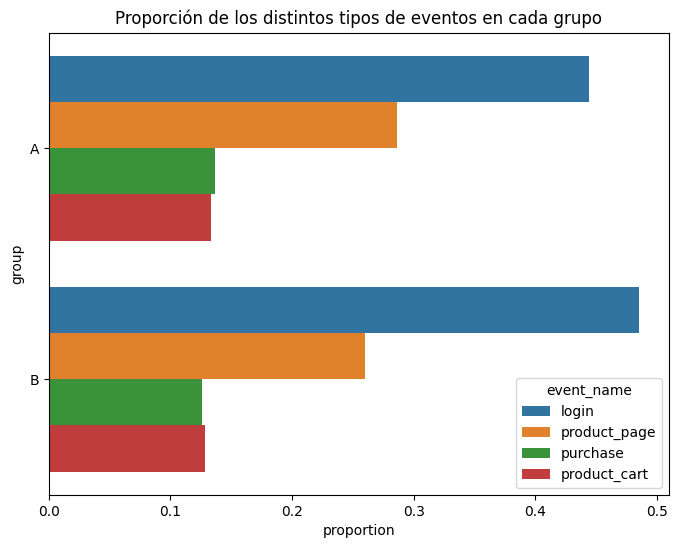

In [35]:
# observamos la distribución de los eventos dentro de cada grupo
f,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=event_proportion,x='proportion',y='group',hue='event_name')
plt.title('Proporción de los distintos tipos de eventos en cada grupo')
plt.show()

C:\Users\rodon\AppData\Local\Temp\ipykernel_272008\1191486398.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_eventsA,color='blue',label='group=A')


OptionError: No such keys(s): 'mode.use_inf_as_null'

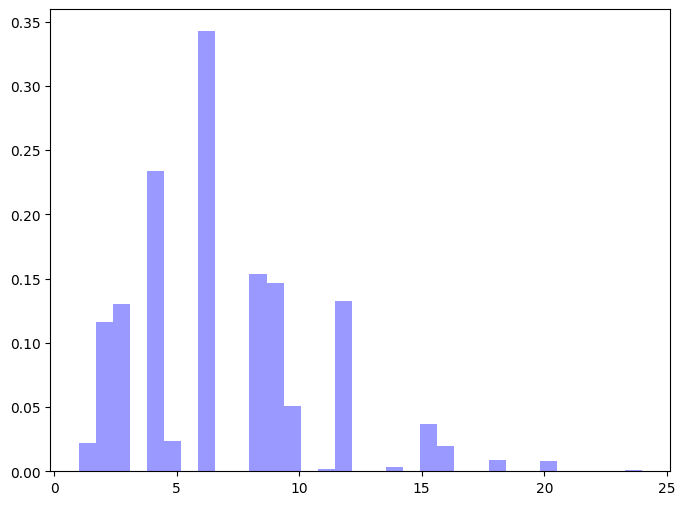

In [39]:
# creamos el gráfico de distribución para la cantidad de eventos por usuario
f,ax=plt.subplots(figsize=(8,6))
num_eventsA=ab_events_users_groups.query('group=="A"').groupby('user_id')['event_name'].count()
num_eventsB=ab_events_users_groups.query('group=="B"').groupby('user_id')['event_name'].count()

# distribución para la cantidad de eventos por usuario del grupo A
sns.distplot(num_eventsA,color='blue',label='group=A')


# distribución para la cantidad de eventos por usuario del grupo A
sns.distplot(num_eventsB,color='red',label='group=B')

plt.title('Distribución para la cantidad de eventos por usuario')
plt.xlabel('count_event')
plt.legend(loc='best')
plt.show()

En el gráfico anterior podemos notar que la cantidad de eventos por usuario tiene una distribución muy similar entre los dos grupos bajo estudio.

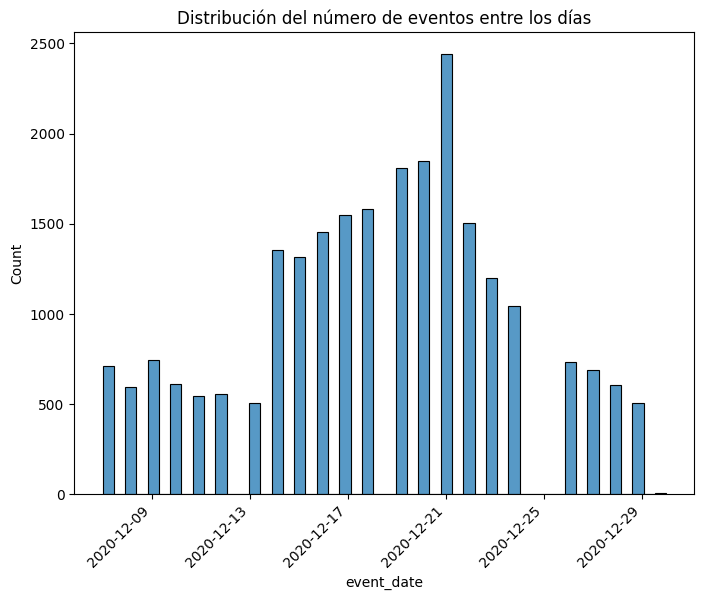

In [119]:
# observemos la distribución de la cantidad de eventos entre los días
plt.subplots(figsize=(8,6))
sns.histplot(ab_events_users_groups['event_date'],bins=50)
plt.xticks(rotation=45,ha='right')
plt.title('Distribución del número de eventos entre los días')
plt.show()

Notamos que hay una gran cantidad de eventos a partir del día 2020-12-14, con un máximo el día 2020-12-21 y disminuyendo a partir de dicho punto. Con muy poca actividad para los últimos días del año 2020.  
El mes de diciembre es un mes donde mucha gente acostumbra a dar regalos para los días 24, 25 y 31, muy posiblemente se esperé mucha actividad de compra en las tiendas, ya sea en línea o física. Así que, realizar una prueba de aumentó de compras o navegación dentro de un sitio online muy posiblemente se vea afectado por dicha actividad de compra y no por los cambios relacionados con la introducción de un sistema de recomendaciones mejorado. Quizás sea mejor probar este nuevo sistema de recomendaciones en alguna otra fecha donde no se espere una situación de compras similar a esta época del año, aunque en esta temporada tenemos la ventaja de poder reunir mucha información para el estudio.

[Volver a contenidos](#contenidos)
## Comparación entre el grupo de control y el grupo de prueba  
Probaremos si existe diferencia entre los grupos. Vamos a calcular la tasa de conversión de los usuarios en cada uno de los eventos dentro de cada grupo.

[Volver a contenidos](#contenidos)
### Prueba t-student

In [120]:
"""Creamos una función para realizar una t-test sobre dos grupos y cada uno de los eventos"""
def ttest_comparation(data,group_1,group_2,alfa,eventos):
    """
    data= el dataframe que contiene los datos filtrados para el estudio
    group_1=el grupo_1 donde se realizará la prueba
    group_2=el group_2 donde se realizará la prueba
    alfa=el nivel de significancia para la prueba
    p1,n_group_1=la proporcion y el tamaño de la muestra del grupo_1
    p2,n_group_2=la proporcion y el tamaño de la muestra del grupo_2
    decision_H0= si se rechaza o no H0
    eventos=la lista que contiene los nombres de los eventos para los que se va a realizar la prueba
    """
    # creamos un dataframe para guardar los resultados de las pruebas
    df = pd.DataFrame(columns=['event_name', 'statistics-t','p_value','alfa','p1','n_group_1',\
                               'p2','n_group_2','decision_H0','grupos_comparados'])
    
    # creamos el ciclo para recorrer la lista de eventos
    for event in eventos:    
        # para cada usuario y grupo vamos a crear una lista
        conversions=data[['user_id','group']].drop_duplicates()

        # obtenemos los usuarios convertidos para un evento
        converted=pd.DataFrame(data={
                        "user_id":data[data['event_name']==event]\
                        ['user_id'].unique(),"converted":1})

        # unimos 'conversions' con 'converted' para crear el dataframe de los usuarios convertidos en el evento
        conversions=conversions.merge(converted,on="user_id",how="left")

        # para los usuarios no convertidos rellenamos con 'cero'
        conversions['converted']=conversions['converted'].fillna(0)

        # creamos la muestra para el group_1
        sample_group_1=conversions[conversions['group']==group_1]['converted']
        # obtenemos el tamaño de la muestra
        n1=len(sample_group_1)
        # obtenemos la proporcion de  usuarios convertidos
        p1=sample_group_1.mean()

        # creamos la muestra para el group_2
        sample_group_2=conversions[conversions['group']==group_2]['converted']
        # obtenemos el tamaño de la muestra
        n2=len(sample_group_2)
        # obtenemos la proporcion de  usuarios convertidos
        p2=sample_group_2.mean()

        # realizamos la prueba
        statistics,p_value=st.ttest_ind(sample_group_1,sample_group_2)
        
        # decision de la prueba, rechazar H0 si:
        if p_value < alfa:
            decision='Rechazar H0'
        else:
            decision='No rechazar H0'

        # guardamos cada uno de los resultados de la prueba en el dataframe
        df.loc[len(df)] = [event,statistics,p_value,alfa,p1,n1,p2,n2,decision,\
                           str(group_1)+" vs "+str(group_2)]
        
    return df

In [121]:
# obtenemos la lista de los eventos a aplicar la prueba
eventos=['product_page','product_cart','purchase']

**Probaremos la hipótesis siguiente para cada tipo de evento:**

- Hipótesis nula: la cantidad de usuarios convertidos en los grupos comparados es el mismo.

- Hipótesis alternativa: la cantidad de usuarios convertidos en los grupos comparados no es el mismo.


Ya que vamos a comparar la media de dos poblaciones, usaremos la prueba estadística `'t de Student'` (**ttes_ind**) con un nivel **alpha=0.05** de significancia. Consideraremos las varianzas de los grupos como iguales.

In [122]:
# aplicamos la funcion para realizar las pruebas t-test sobre los eventos y grupos de control
ttest_comparation(data=ab_events_users_groups,group_1='A',group_2='B',alfa=0.05,eventos=eventos)

,event_name,statistics-t,p_value,alfa,p1,n_group_1,p2,n_group_2,decision_H0,grupos_comparados
0,product_page,4.607807,0.000004,0.05,0.647980,2747,0.563578,928,Rechazar H0,A vs B
1,product_cart,1.456185,0.145427,0.05,0.299964,2747,0.274784,928,No rechazar H0,A vs B
2,purchase,2.375263,0.017587,0.05,0.317437,2747,0.275862,928,Rechazar H0,A vs B


Notamos que solo el evento `'product_cart'` no tiene significancia estadística, lo que nos lleva a no rechazar la hipótesis nula de que la cantidad de usuarios convertidos es el mismo entre los grupos comparados, usando un valor alfa de 5%.

[Volver a contenidos](#contenidos)
### Prueba Z para dos proporciones

In [123]:
"""Creamos una función para realizar una Z-test sobre dos proporciones y cada uno de los eventos"""
def ztest_comparation(data,group_1,group_2,alfa,eventos):
    """
    data= el dataframe que contiene los datos filtrados para el estudio
    group_1=el grupo_1 donde se realizará la prueba
    group_2=el group_2 donde se realizará la prueba
    alfa=el nivel de significancia para la prueba
    p1,n_group_1=la proporcion y el tamaño de la muestra del grupo_1
    p2,n_group_2=la proporcion y el tamaño de la muestra del grupo_2
    decision_H0= si se rechaza o no H0
    eventos=la lista que contiene los nombres de los eventos para los que se va a realizar la prueba
    """
    # creamos un dataframe para guardar los resultados de las pruebas
    df = pd.DataFrame(columns=['event_name', 'statistics-z','p_value','alfa','p1','n_group_1',\
                               'p2','n_group_2','decision_H0','grupos_comparados'])
    
    # creamos el ciclo para recorrer la lista de eventos
    for event in eventos:    
        # para cada usuario y grupo vamos a crear una lista
        conversions=data[['user_id','group']].drop_duplicates()

        # obtenemos los usuarios convertidos para un evento
        converted=pd.DataFrame(data={
                        "user_id":data[data['event_name']==event]\
                        ['user_id'].unique(),"converted":1})

        # unimos 'conversions' con 'converted' para crear el dataframe de los usuarios convertidos en el evento
        conversions=conversions.merge(converted,on="user_id",how="left")

        # para los usuarios no convertidos rellenamos con 'cero'
        conversions['converted']=conversions['converted'].fillna(0)

        # creamos la muestra para el group_1
        sample_group_1=conversions[conversions['group']==group_1]['converted']
        # obtenemos el tamaño de la muestra
        n1=len(sample_group_1)
        # obtenemos la proporcion de  usuarios convertidos
        p1=sample_group_1.mean()

        # creamos la muestra para el group_2
        sample_group_2=conversions[conversions['group']==group_2]['converted']
        # obtenemos el tamaño de la muestra
        n2=len(sample_group_2)
        # obtenemos la proporcion de  usuarios convertidos
        p2=sample_group_2.mean()

        # realizamos la prueba
        statistics,p_value=sm.stats.proportions_ztest([n1*p1, n2*p2], [n1, n2])
        
        # decision de la prueba, rechazar H0 si:
        if p_value < alfa:
            decision='Rechazar H0'
        else:
            decision='No rechazar H0'

        # guardamos cada uno de los resultados de la prueba en el dataframe
        df.loc[len(df)] = [event,statistics,p_value,alfa,p1,n1,p2,n2,decision,\
                           str(group_1)+" vs "+str(group_2)]
        
    return df

**Probaremos la hipótesis siguiente para cada tipo de evento:**

- Hipótesis nula: la proporción de usuarios convertidos en los grupos comparados es el mismo.

- Hipótesis alternativa: la proporción de usuarios convertidos en los grupos comparados no es el mismo.


Ya que vamos a comparar la proporción entre dos poblaciones, usaremos la prueba estadística `'Z para dos proporciones'` (**stats.proportions_ztest**) con un nivel **alpha=0.05** de significancia.

In [124]:
# aplicamos la funcion para realizar las pruebas z-test sobre los eventos y grupos de control
ztest_comparation(data=ab_events_users_groups,group_1='A',group_2='B',alfa=0.05,eventos=eventos)

,event_name,statistics-z,p_value,alfa,p1,n_group_1,p2,n_group_2,decision_H0,grupos_comparados
0,product_page,4.595797,0.000004,0.05,0.647980,2747,0.563578,928,Rechazar H0,A vs B
1,product_cart,1.456161,0.145348,0.05,0.299964,2747,0.274784,928,No rechazar H0,A vs B
2,purchase,2.374087,0.017592,0.05,0.317437,2747,0.275862,928,Rechazar H0,A vs B


Notamos que solo el evento `'product_cart'` no tiene significancia estadística, lo que nos lleva a no rechazar la hipótesis nula de que la proporción de usuarios convertidos es el mismo entre los grupos comparados. Coincidiendo esto mismo con los resultados de la prueba `'t-test'`, usando un valor alfa de 5%.

[Volver a contenidos](#contenidos)
## Conclusiones

Los eventos `'product_page'` y `'purchase'` presentan diferencias estadísticas significativas y dado el valor de **p1** que muestran, al parecer las proporciones son mayores **a favor del grupo A.** Esto pueda deberse al tamaño de muestra con el que se cuenta ya que inicialmente se tenían contemplados seis mil usuarios participantes y en los datos solo contamos con 3,675 apenas un 61% de lo planeado. **Además, tenemos 2,747 usuarios del grupo A y solo 928 para el grupo B,** casi 3 veces menos usuarios en el grupo B comparado al grupo A.